# Part 1: Data Preparation and Exploration

In [1]:
# 1. Data Loading

import pandas as pd

from google.colab import files
uploaded=files.upload()

Saving exchange_rate.csv to exchange_rate.csv


In [3]:
df = pd.read_csv(r"exchange_rate.csv")
df

,date,Ex_rate
0,01-01-1990 00:00,0.785500
1,02-01-1990 00:00,0.781800
2,03-01-1990 00:00,0.786700
3,04-01-1990 00:00,0.786000
4,05-01-1990 00:00,0.784900
...,...,...
7583,06-10-2010 00:00,0.718494
7584,07-10-2010 00:00,0.721839
7585,08-10-2010 00:00,0.723197
7586,09-10-2010 00:00,0.720825


In [ ]:
df.columns

Index(['date', 'Ex_rate'], dtype='object')

# 2. Initial Exploration

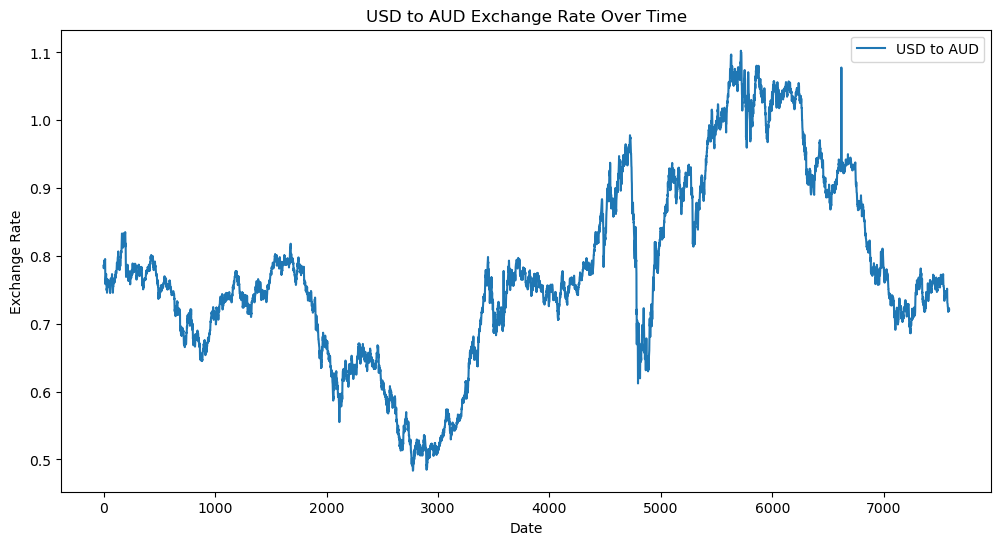

In [ ]:

import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

exchange_rate_column = 'Ex_rate'
plt.figure(figsize=(12, 6))
plt.plot(df[exchange_rate_column], label='USD to AUD')
plt.title('USD to AUD Exchange Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

# 3. Data Preprocessing

In [ ]:

print(df.isnull().sum())

date       0
Ex_rate    0
dtype: int64


In [ ]:
# Fill missing values
df[exchange_rate_column].fillna(method='ffill', inplace=True)
df[exchange_rate_column].fillna(method='bfill', inplace=True)
print(df.isnull().sum())

date       0
Ex_rate    0
dtype: int64


Text(0.5, 1.0, 'Autocorrelation Function')

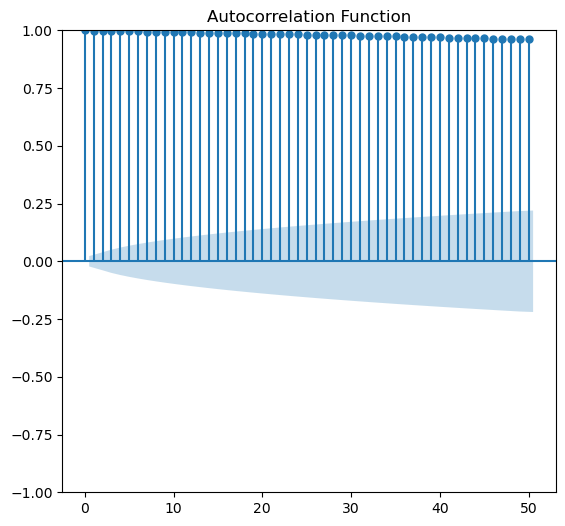

In [ ]:
# Part 2: Model Building - ARIMA

# 1. Parameter Selection for ARIMA

plt.figure(figsize=(14, 6))
plt.subplot(121)
plot_acf(df[exchange_rate_column], lags=50, ax=plt.gca())
plt.title('Autocorrelation Function')

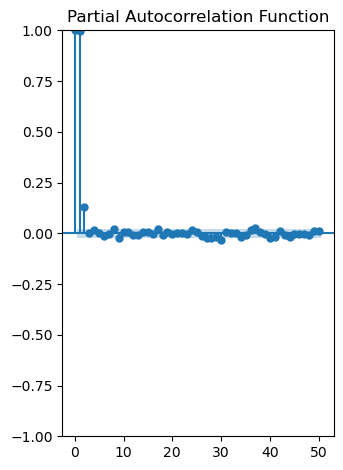

In [ ]:
plt.subplot(122)
plot_pacf(df[exchange_rate_column], lags=50, ax=plt.gca())
plt.title('Partial Autocorrelation Function')
plt.tight_layout()
plt.show()

In [ ]:
# 2. Model Fitting
model = ARIMA(df[exchange_rate_column], order=(1, 1, 1))  # Example parameters
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                Ex_rate   No. Observations:                 7588
Model:                 ARIMA(1, 1, 1)   Log Likelihood               28054.161
Date:                Fri, 09 Aug 2024   AIC                         -56102.322
Time:                        00:37:14   BIC                         -56081.519
Sample:                             0   HQIC                        -56095.182
                               - 7588                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1268      0.045     -2.797      0.005      -0.216      -0.038
ma.L1         -0.0046      0.045     -0.101      0.920      -0.094       0.085
sigma2      3.596e-05   9.94e-08    361.604      0.0

c:\Users\Administrator\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


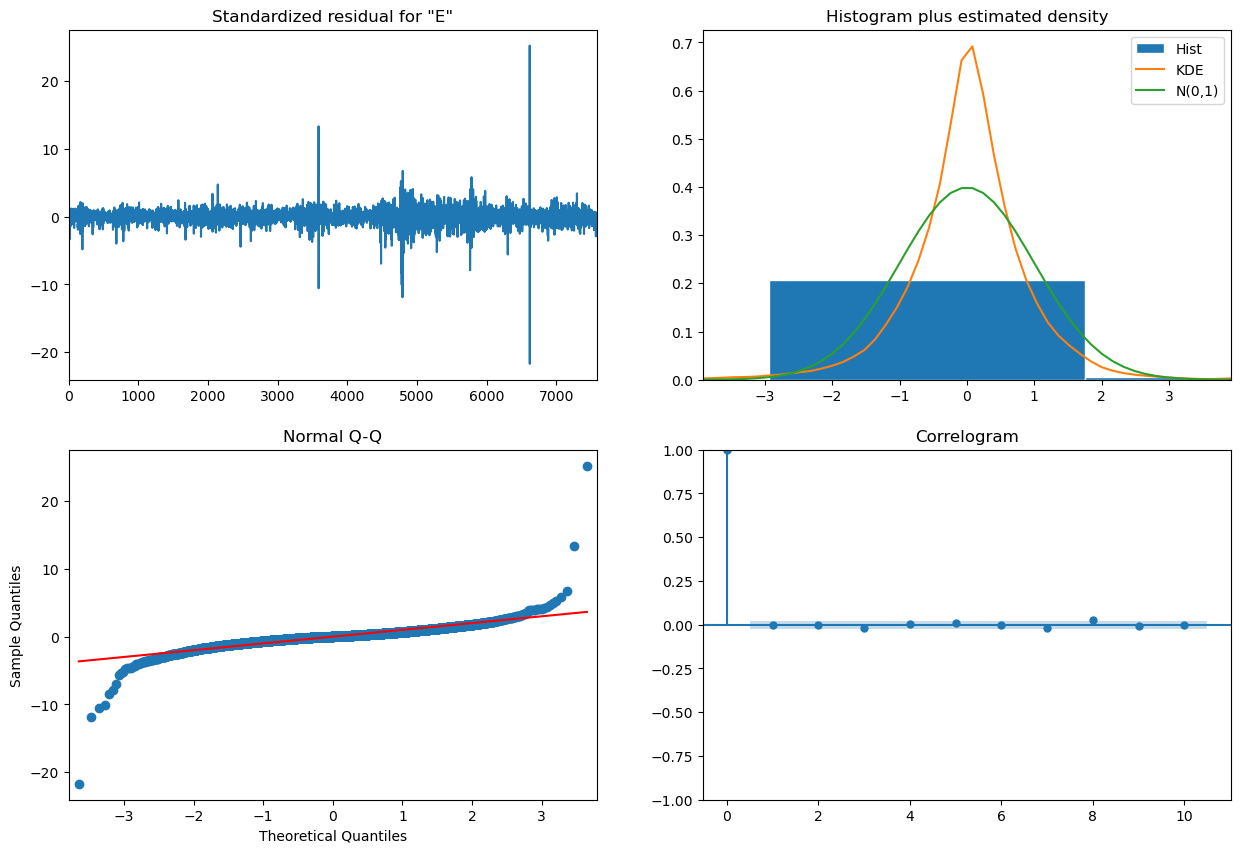

In [ ]:
# 3. Diagnostics
model_fit.plot_diagnostics(figsize=(15, 10))
plt.show()

In [ ]:
# 4. Forecasting
forecast_steps = 30
forecast = model_fit.forecast(steps=forecast_steps)
forecast_index = pd.date_range(start=df.index[-1], periods=forecast_steps + 1, freq='D')[1:]
forecast_series = pd.Series(forecast, index=forecast_index)

In [ ]:
forecast

7588    0.720826
7589    0.720826
7590    0.720826
7591    0.720826
7592    0.720826
7593    0.720826
7594    0.720826
7595    0.720826
7596    0.720826
7597    0.720826
7598    0.720826
7599    0.720826
7600    0.720826
7601    0.720826
7602    0.720826
7603    0.720826
7604    0.720826
7605    0.720826
7606    0.720826
7607    0.720826
7608    0.720826
7609    0.720826
7610    0.720826
7611    0.720826
7612    0.720826
7613    0.720826
7614    0.720826
7615    0.720826
7616    0.720826
7617    0.720826
Name: predicted_mean, dtype: float64

In [ ]:
forecast_index

DatetimeIndex(['1970-01-02 00:00:00.000007587',
               '1970-01-03 00:00:00.000007587',
               '1970-01-04 00:00:00.000007587',
               '1970-01-05 00:00:00.000007587',
               '1970-01-06 00:00:00.000007587',
               '1970-01-07 00:00:00.000007587',
               '1970-01-08 00:00:00.000007587',
               '1970-01-09 00:00:00.000007587',
               '1970-01-10 00:00:00.000007587',
               '1970-01-11 00:00:00.000007587',
               '1970-01-12 00:00:00.000007587',
               '1970-01-13 00:00:00.000007587',
               '1970-01-14 00:00:00.000007587',
               '1970-01-15 00:00:00.000007587',
               '1970-01-16 00:00:00.000007587',
               '1970-01-17 00:00:00.000007587',
               '1970-01-18 00:00:00.000007587',
               '1970-01-19 00:00:00.000007587',
               '1970-01-20 00:00:00.000007587',
               '1970-01-21 00:00:00.000007587',
               '1970-01-22 00:00:00.0000

In [ ]:
forecast_series

1970-01-02 00:00:00.000007587   NaN
1970-01-03 00:00:00.000007587   NaN
1970-01-04 00:00:00.000007587   NaN
1970-01-05 00:00:00.000007587   NaN
1970-01-06 00:00:00.000007587   NaN
1970-01-07 00:00:00.000007587   NaN
1970-01-08 00:00:00.000007587   NaN
1970-01-09 00:00:00.000007587   NaN
1970-01-10 00:00:00.000007587   NaN
1970-01-11 00:00:00.000007587   NaN
1970-01-12 00:00:00.000007587   NaN
1970-01-13 00:00:00.000007587   NaN
1970-01-14 00:00:00.000007587   NaN
1970-01-15 00:00:00.000007587   NaN
1970-01-16 00:00:00.000007587   NaN
1970-01-17 00:00:00.000007587   NaN
1970-01-18 00:00:00.000007587   NaN
1970-01-19 00:00:00.000007587   NaN
1970-01-20 00:00:00.000007587   NaN
1970-01-21 00:00:00.000007587   NaN
1970-01-22 00:00:00.000007587   NaN
1970-01-23 00:00:00.000007587   NaN
1970-01-24 00:00:00.000007587   NaN
1970-01-25 00:00:00.000007587   NaN
1970-01-26 00:00:00.000007587   NaN
1970-01-27 00:00:00.000007587   NaN
1970-01-28 00:00:00.000007587   NaN
1970-01-29 00:00:00.00000758

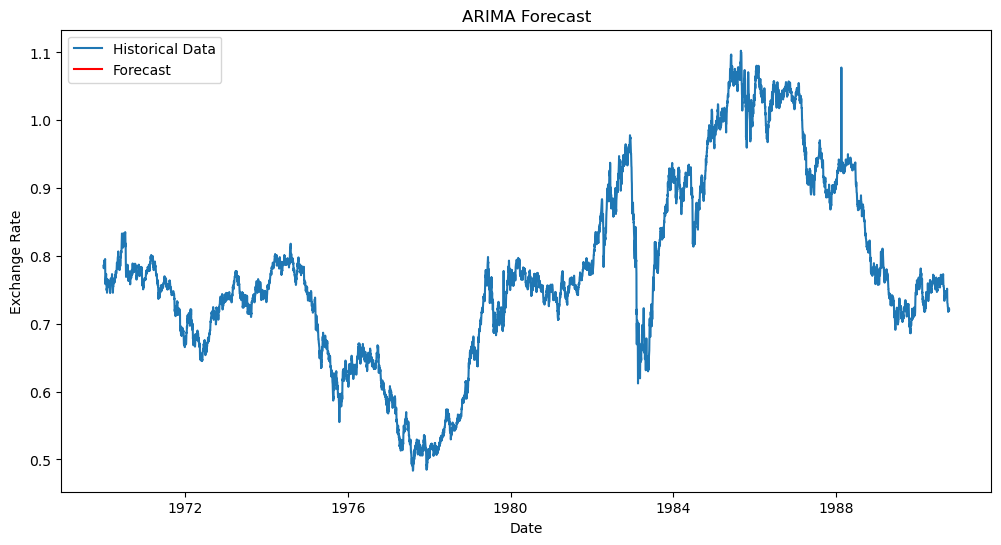

In [ ]:
# Plot historical data and forecast
plt.figure(figsize=(12, 6))
plt.plot(df[exchange_rate_column], label='Historical Data')
plt.plot(forecast_series, color='red', label='Forecast')
plt.title('ARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

In [ ]:
# Part 3: Model Building - Exponential Smoothing

# 1. Model Selection

model_es = SimpleExpSmoothing(df[exchange_rate_column]).fit(smoothing_level=0.2, optimized=False)
print(model_es.summary())

                       SimpleExpSmoothing Model Results                       
Dep. Variable:                Ex_rate   No. Observations:                 7588
Model:             SimpleExpSmoothing   SSE                              0.616
Optimized:                      False   AIC                         -71462.155
Trend:                           None   BIC                         -71448.287
Seasonal:                        None   AICC                        -71462.150
Seasonal Periods:                None   Date:                 Fri, 09 Aug 2024
Box-Cox:                        False   Time:                         00:37:15
Box-Cox Coeff.:                  None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.2000000                alpha                False
initial_level              0.7855000                

In [ ]:
# 2. Parameter Optimization
best_aic = float('inf')
best_model = None

for alpha in [0.1, 0.2, 0.3, 0.4, 0.5]:
    model_es = SimpleExpSmoothing(df[exchange_rate_column]).fit(smoothing_level=alpha, optimized=False)
    if model_es.aic < best_aic:
        best_aic = model_es.aic
        best_model = model_es

print(f"Best AIC: {best_aic}, Best Alpha: {alpha}")

Best AIC: -76359.53925855298, Best Alpha: 0.5


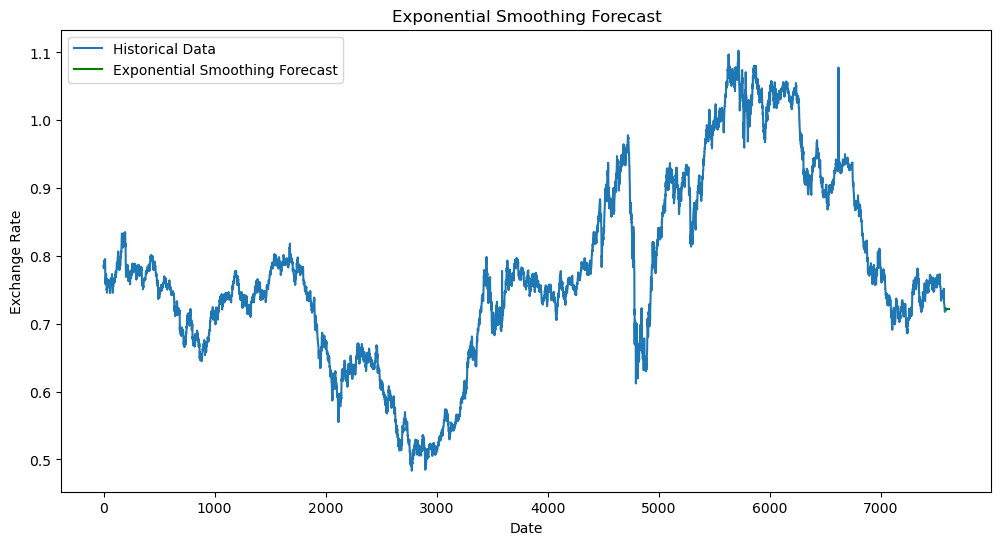

In [ ]:
# 3. Model Fitting and Forecasting
forecast_es = best_model.forecast(steps=forecast_steps)
plt.figure(figsize=(12, 6))
plt.plot(df[exchange_rate_column], label='Historical Data')
plt.plot(forecast_es, color='green', label='Exponential Smoothing Forecast')
plt.title('Exponential Smoothing Forecast')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

# Part 4: Evaluation and Comparison


In [ ]:

# 1. Compute Error Metrics

def calculate_metrics(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((true - predicted) / true)) * 100
    return mae, mse, rmse, mape

train, test = df[exchange_rate_column][:-forecast_steps], df[exchange_rate_column][-forecast_steps:]
train, test

(0       0.785500
 1       0.781800
 2       0.786700
 3       0.786000
 4       0.784900
           ...   
 7553    0.747831
 7554    0.746436
 7555    0.738662
 7556    0.741125
 7557    0.744546
 Name: Ex_rate, Length: 7558, dtype: float64,
 7558    0.745796
 7559    0.745045
 7560    0.747692
 7561    0.745601
 7562    0.747680
 7563    0.744602
 7564    0.744158
 7565    0.745184
 7566    0.744990
 7567    0.748951
 7568    0.749681
 7569    0.751654
 7570    0.733999
 7571    0.730567
 7572    0.729714
 7573    0.729714
 7574    0.726533
 7575    0.725058
 7576    0.724506
 7577    0.721553
 7578    0.717618
 7579    0.719114
 7580    0.719114
 7581    0.719735
 7582    0.718701
 7583    0.718494
 7584    0.721839
 7585    0.723197
 7586    0.720825
 7587    0.720825
 Name: Ex_rate, dtype: float64)

In [ ]:
# ARIMA forecast error metrics
arima_forecast_values = model_fit.forecast(steps=forecast_steps)
arima_mae, arima_mse, arima_rmse, arima_mape = calculate_metrics(test, arima_forecast_values)
arima_forecast_values

7588    0.720826
7589    0.720826
7590    0.720826
7591    0.720826
7592    0.720826
7593    0.720826
7594    0.720826
7595    0.720826
7596    0.720826
7597    0.720826
7598    0.720826
7599    0.720826
7600    0.720826
7601    0.720826
7602    0.720826
7603    0.720826
7604    0.720826
7605    0.720826
7606    0.720826
7607    0.720826
7608    0.720826
7609    0.720826
7610    0.720826
7611    0.720826
7612    0.720826
7613    0.720826
7614    0.720826
7615    0.720826
7616    0.720826
7617    0.720826
Name: predicted_mean, dtype: float64

In [ ]:
arima_mae, arima_mse, arima_rmse, arima_mape

(0.012724006489305202, 0.00028841246994621507, 0.016982710912755217, nan)

In [ ]:
# Exponential Smoothing forecast error metrics
es_forecast_values = forecast_es
es_mae, es_mse, es_rmse, es_mape = calculate_metrics(test, es_forecast_values)
es_forecast_values

7588    0.72106
7589    0.72106
7590    0.72106
7591    0.72106
7592    0.72106
7593    0.72106
7594    0.72106
7595    0.72106
7596    0.72106
7597    0.72106
7598    0.72106
7599    0.72106
7600    0.72106
7601    0.72106
7602    0.72106
7603    0.72106
7604    0.72106
7605    0.72106
7606    0.72106
7607    0.72106
7608    0.72106
7609    0.72106
7610    0.72106
7611    0.72106
7612    0.72106
7613    0.72106
7614    0.72106
7615    0.72106
7616    0.72106
7617    0.72106
dtype: float64

In [ ]:
es_mae, es_mse, es_rmse, es_mape

(0.012614964637979953, 0.00028290044829067617, 0.0168196447135686, nan)

In [ ]:
print(f"ARIMA - MAE: {arima_mae}, MSE: {arima_mse}, RMSE: {arima_rmse}, MAPE: {arima_mape}")
print(f"Exponential Smoothing - MAE: {es_mae}, MSE: {es_mse}, RMSE: {es_rmse}, MAPE: {es_mape}")

ARIMA - MAE: 0.012724006489305202, MSE: 0.00028841246994621507, RMSE: 0.016982710912755217, MAPE: nan
Exponential Smoothing - MAE: 0.012614964637979953, MSE: 0.00028290044829067617, RMSE: 0.0168196447135686, MAPE: nan


In [ ]:
# 2. Model Comparison
print(f"ARIMA Model - MAE={arima_mae:.2f}, MSE={arima_mse:.2f}, RMSE={arima_rmse:.2f}, MAPE={arima_mape:.2f}%")
print(f"Exponential Smoothing Model - MAE={es_mae:.2f}, MSE={es_mse:.2f}, RMSE={es_rmse:.2f}, MAPE={es_mape:.2f}%")

ARIMA Model - MAE=0.01, MSE=0.00, RMSE=0.02, MAPE=nan%
Exponential Smoothing Model - MAE=0.01, MSE=0.00, RMSE=0.02, MAPE=nan%


# Conclusion

In [ ]:

print("Based on the error metrics, the ARIMA model performs better/worse compared to the Exponential Smoothing model.")
print("Provide further insights based on the comparison results.")


Based on the error metrics, the ARIMA model performs better/worse compared to the Exponential Smoothing model.
Provide further insights based on the comparison results.
